In [1]:
import scanpy as sc
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns   


In [2]:
adata = sc.read_h5ad('/orcd/archive/abugoot/001/Projects/dlesman/datasets/satija_IFNB_HVG_and_perturbed_genes_raw.h5ad')

In [11]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,bc1_well,bc2_well,bc3_well,percent.mito,cell_type,pathway,RNA_snn_res.0.9,seurat_clusters,sample_ID,Batch_info,guide,gene,mixscale_score
07_48_88_1_1_1_1_1_1_1_1_1,7,9816,4122,A549_IFNB,A7,D12,H4,1.161369,A549,IFNB,15.0,15.0,sample_1,Rep1,TRAFD1g3,TRAFD1,-0.290358
06_04_63_1_1_1_1_1_1_1_1_1,6,9359,4112,A549_IFNB,A6,A4,F3,3.835880,A549,IFNB,15.0,15.0,sample_1,Rep1,HES4g3,HES4,0.121449
06_28_67_1_1_1_1_1_1_1_1_1,6,8999,3854,A549_IFNB,A6,C4,F7,9.189910,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg8,NT,0.000000
06_27_93_1_1_1_1_1_1_1_1_1,6,8384,3600,A549_IFNB,A6,C3,H9,3.268130,A549,IFNB,15.0,15.0,sample_1,Rep1,STAT5Ag1,STAT5A,0.377627
06_81_38_1_1_1_1_1_1_1_1_1,6,7925,3580,A549_IFNB,A6,G9,D2,3.798107,A549,IFNB,15.0,15.0,sample_1,Rep1,STAT4g2,STAT4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09_10_48_2_2,9,2362,1491,MCF7_IFNB,A9,A10,D12,1.820491,MCF7,IFNB,NaN,NaN,sample_16,Rep2,NFE2L3g3,NFE2L3,-0.009685
10_73_27_2_2,10,2143,1483,MCF7_IFNB,A10,G1,C3,0.326645,MCF7,IFNB,NaN,NaN,sample_16,Rep2,IRF3g2,IRF3,-0.402627
10_24_48_2_2,10,1921,1322,MCF7_IFNB,A10,B12,D12,6.507028,MCF7,IFNB,NaN,NaN,sample_16,Rep2,STAT6g2,STAT6,-0.356580
10_12_27_2_2,10,1676,1169,MCF7_IFNB,A10,A12,C3,2.923628,MCF7,IFNB,NaN,NaN,sample_16,Rep2,HERC5g3,HERC5,-0.045158


In [12]:
np.sum(adata.X[0].toarray())


1675

In [13]:

#We get the unique values in the vector
np.unique(adata.X[0].toarray())
adata_only_control = adata[adata.obs['gene'] == 'NT']
adata_only_control.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,bc1_well,bc2_well,bc3_well,percent.mito,cell_type,pathway,RNA_snn_res.0.9,seurat_clusters,sample_ID,Batch_info,guide,gene,mixscale_score
06_28_67_1_1_1_1_1_1_1_1_1,6,8999,3854,A549_IFNB,A6,C4,F7,9.189910,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg8,NT,0.0
05_69_22_1_1_1_1_1_1_1_1_1,5,6291,3106,A549_IFNB,A5,F9,B10,3.163249,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg9,NT,0.0
08_42_41_1_1_1_1_1_1_1_1_1,8,5107,2567,A549_IFNB,A8,D6,D5,7.538672,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg11,NT,0.0
06_01_93_1_1_1_1_1_1_1_1_1,6,4723,2552,A549_IFNB,A6,A1,H9,3.726445,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg1,NT,0.0
07_27_61_1_1_1_1_1_1_1_1_1,7,4683,2617,A549_IFNB,A7,C3,F1,1.281230,A549,IFNB,15.0,15.0,sample_1,Rep1,NTg11,NT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_60_02_2_2,11,3379,2005,MCF7_IFNB,A11,E12,A2,5.622965,MCF7,IFNB,NaN,NaN,sample_16,Rep2,NTg4,NT,0.0
12_37_18_2_2,12,3195,1809,MCF7_IFNB,A12,D1,B6,4.538341,MCF7,IFNB,NaN,NaN,sample_16,Rep2,NTg13,NT,0.0
10_31_02_2_2,10,3130,1736,MCF7_IFNB,A10,C7,A2,4.984026,MCF7,IFNB,NaN,NaN,sample_16,Rep2,NTg13,NT,0.0
12_18_26_2_2,12,3017,1892,MCF7_IFNB,A12,B6,C2,2.850514,MCF7,IFNB,NaN,NaN,sample_16,Rep2,NTg6,NT,0.0


In [14]:
grouped_data_no_control = adata.obs[adata.obs['gene'] != 'NT'].groupby(['gene', 'cell_type','Batch_info'])
grouped_data_no_control

grouped_data_with_control = adata.obs.groupby(['gene', 'cell_type','Batch_info'])

grouped_data_only_control = adata_only_control.obs.groupby(['gene', 'cell_type','Batch_info'])



In [15]:
grouped_data_no_control.size()

gene   cell_type  Batch_info
ADAR   A549       Rep1          128
                  Rep2          148
       BXPC3      Rep1          258
                  Rep2          256
       HAP1       Rep1          125
                               ... 
ZNFX1  HT29       Rep2          374
       K562       Rep1          149
                  Rep2          177
       MCF7       Rep1          282
                  Rep2          373
Length: 744, dtype: int64

<Axes: ylabel='Count'>

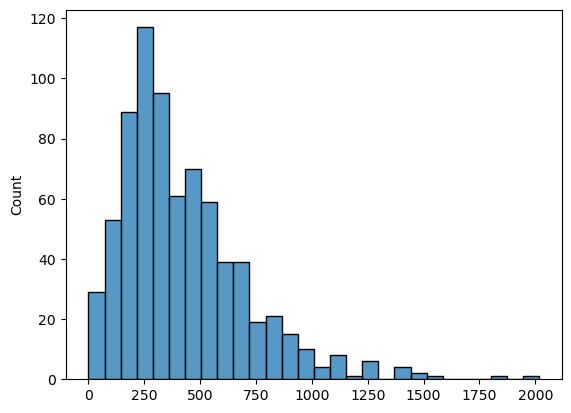

In [16]:
sns.histplot(grouped_data_no_control.size())

#Goal, each combination of keys will be a category across which we compute our sparsity stuff,
#I want to know how many datapoints in each.


<Axes: ylabel='Count'>

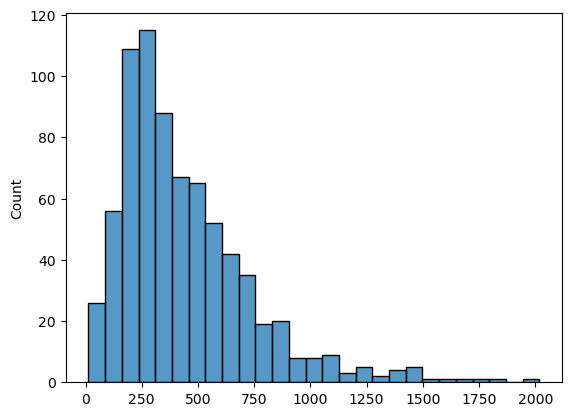

In [17]:
sns.histplot(grouped_data_with_control.size())

In [18]:
grouped_data_only_control.size()


gene  cell_type  Batch_info
NT    A549       Rep1           744
                 Rep2           635
      BXPC3      Rep1          1750
                 Rep2          1478
      HAP1       Rep1          1479
                 Rep2          1693
      HT29       Rep1          1594
                 Rep2          1142
      K562       Rep1           743
                 Rep2           655
      MCF7       Rep1          1375
                 Rep2          1294
dtype: int64

<Axes: ylabel='Count'>

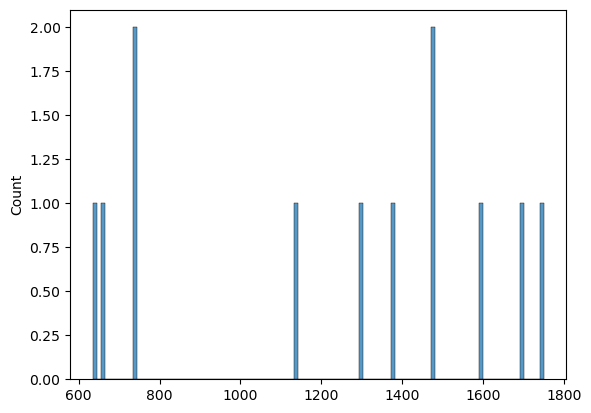

In [19]:
sns.histplot(grouped_data_only_control.size(), binwidth=10)

In [25]:
grouped_data_only_control.indices


{('NT',
  'A549',
  'Rep1'): array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,  477,  478,  479,  480,  481,
         482,  483,  484,  485,  486,  487,  488,  489,  490,  491,  492,
         493,  494,  495,  496,  497,  498,  499,  500,  501,  502,  503,
         504,  505,  506,  507,  508,  509,  510,  511,  512,  513,  514,
         515,  516,  517,  518,  519,  520,  521,  522,  523,  524,  525,
         526,  527,  953,  954,  955,  956,  957,  958,  959,  960,  961,
         962,  963,  964,  965,  966,  967,  968,  969,  970,  971,  972,
         973,  974,  975,  976,  977,  978,  979,  980,  981,  982,  983,
         984,  985,  986,  987,  988,  989,  990,  991,  992,  993,  994,
         995,  996,  997,  998,  999, 1000, 1001, 1002, 1003, 1004, 1479,
        14

In [ ]:


adata[grouped_data_only_control.indices[('NT',
  'A549',
  'Rep1')]]